<a href="https://colab.research.google.com/github/koki-takada-1/machine-learning_summary/blob/main/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kion10y.csv to kion10y.csv


In [2]:
import pandas as pd

# PandasでCSVを読み込む 
df = pd.read_csv("kion10y.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる 
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = "{:02d}/{:02d}".format(m,d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める 
avs = {}
for key in sorted(md):
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))


01/01 : 6.0
01/02 : 6.545454545454546
01/03 : 6.145454545454546
01/04 : 6.1
01/05 : 6.4818181818181815
01/06 : 6.663636363636363
01/07 : 6.290909090909091
01/08 : 6.718181818181818
01/09 : 6.6000000000000005
01/10 : 6.0636363636363635
01/11 : 5.972727272727272
01/12 : 5.045454545454546
01/13 : 5.427272727272728
01/14 : 5.090909090909092
01/15 : 5.4363636363636365
01/16 : 5.654545454545454
01/17 : 5.627272727272726
01/18 : 5.045454545454546
01/19 : 6.0636363636363635
01/20 : 5.6909090909090905
01/21 : 5.6
01/22 : 5.5636363636363635
01/23 : 5.890909090909091
01/24 : 5.4818181818181815
01/25 : 6.0
01/26 : 6.027272727272727
01/27 : 6.363636363636363
01/28 : 6.5
01/29 : 6.281818181818181
01/30 : 6.763636363636365
01/31 : 6.754545454545453
02/01 : 6.309090909090909
02/02 : 6.663636363636363
02/03 : 6.363636363636363
02/04 : 5.800000000000001
02/05 : 5.790909090909091
02/06 : 5.318181818181818
02/07 : 6.1909090909090905
02/08 : 5.645454545454545
02/09 : 5.754545454545455
02/10 : 6.62727272727

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


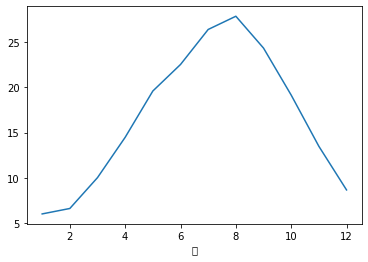

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# CSVを読み込む 
df = pd.read_csv("kion10y.csv", encoding="utf-8")
# 月ごとに平均を求める 
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()
# 結果を出力 
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


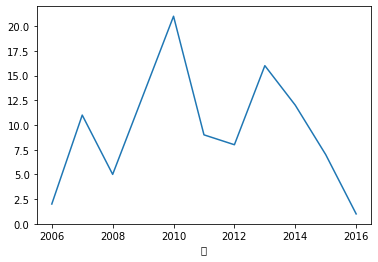

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# ファイルを読む
df = pd.read_csv('kion10y.csv', encoding="utf-8")
# 気温が30度超えのデータを調べる 
atui_bool = (df["気温"] > 30)
# データを抜き出す 
atui = df[atui_bool]
# 年ごとにカウント 
cnt = atui.groupby(["年"])["年"].count()
# 出力
print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


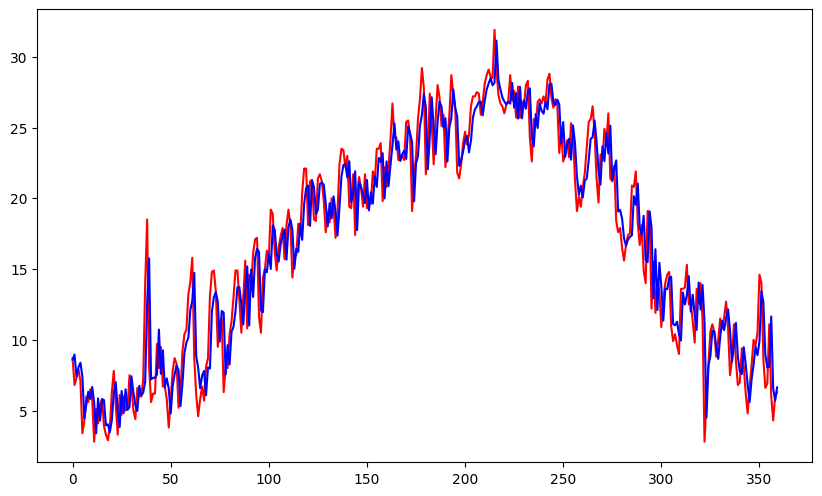

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する 
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# 過去6日分を学習するデータを作成 
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

In [ ]:
print("train_x=",train_x)
print("train_y=",train_y)
print("train_x.shape=",len(train_x))
print("np.shape(train_x)=",np.shape(train_x) )
print("np.shape(train_y)=",np.shape(train_y) )

train_x= [[3.6, 4.0, 3.7, 4.0, 3.6, 2.1], [4.0, 3.7, 4.0, 3.6, 2.1, 2.8], [3.7, 4.0, 3.6, 2.1, 2.8, 4.2], [4.0, 3.6, 2.1, 2.8, 4.2, 3.7], [3.6, 2.1, 2.8, 4.2, 3.7, 4.3], [2.1, 2.8, 4.2, 3.7, 4.3, 6.1], [2.8, 4.2, 3.7, 4.3, 6.1, 6.1], [4.2, 3.7, 4.3, 6.1, 6.1, 4.0], [3.7, 4.3, 6.1, 6.1, 4.0, 6.6], [4.3, 6.1, 6.1, 4.0, 6.6, 10.7], [6.1, 6.1, 4.0, 6.6, 10.7, 9.0], [6.1, 4.0, 6.6, 10.7, 9.0, 8.0], [4.0, 6.6, 10.7, 9.0, 8.0, 5.6], [6.6, 10.7, 9.0, 8.0, 5.6, 4.2], [10.7, 9.0, 8.0, 5.6, 4.2, 4.0], [9.0, 8.0, 5.6, 4.2, 4.0, 1.3], [8.0, 5.6, 4.2, 4.0, 1.3, 3.1], [5.6, 4.2, 4.0, 1.3, 3.1, 2.5], [4.2, 4.0, 1.3, 3.1, 2.5, 4.4], [4.0, 1.3, 3.1, 2.5, 4.4, 5.5], [1.3, 3.1, 2.5, 4.4, 5.5, 6.0], [3.1, 2.5, 4.4, 5.5, 6.0, 6.8], [2.5, 4.4, 5.5, 6.0, 6.8, 5.5], [4.4, 5.5, 6.0, 6.8, 5.5, 6.0], [5.5, 6.0, 6.8, 5.5, 6.0, 8.4], [6.0, 6.8, 5.5, 6.0, 8.4, 7.1], [6.8, 5.5, 6.0, 8.4, 7.1, 5.7], [5.5, 6.0, 8.4, 7.1, 5.7, 7.8], [6.0, 8.4, 7.1, 5.7, 7.8, 6.0], [8.4, 7.1, 5.7, 7.8, 6.0, 1.6], [7.1, 5.7, 7.8, 6.0, 1.6

##7日間の予測に変える

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


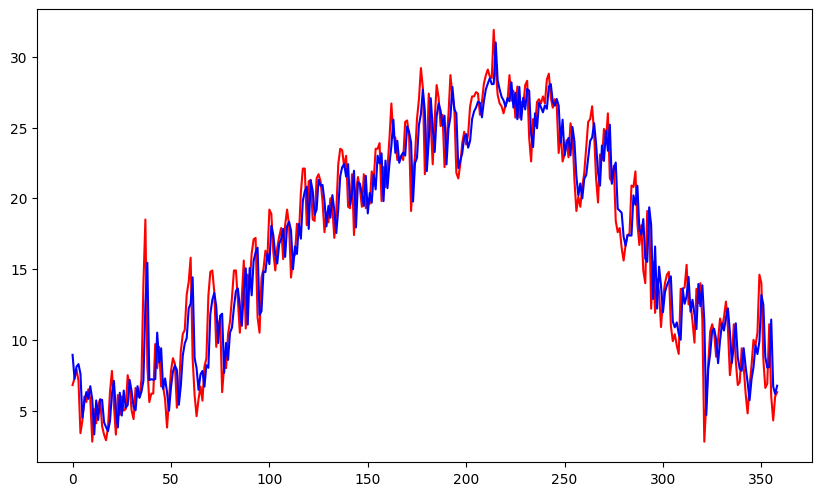

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する 
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 7

# 過去6日分を学習するデータを作成 
def make_data(data):
    x = [] # 学習データ
    y = [] # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う 
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット 
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kion-lr.png')
plt.show();

In [6]:
df = pd.read_csv('kion10y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する 
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)

av=[] # 真値と予測値の誤差の絶対値の平均
mx=[] # 真値と予測値の誤差の絶対値の最大値
dter=[] # 決定係数

for i in range(1,16): # 1～15までintervalを変えて予測の変化を見る
    interval = i
    train_x, train_y = make_data(df[train_year])
    test_x, test_y = make_data(df[test_year])

    # 線形回帰分析を行う 
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y) # 学習
    pre_y = lr.predict(test_x) # 予測

    diff_y=[abs(pre_y[i]-test_y[i]) for i in range(len(test_y))]
    av.append(sum(diff_y)/len(diff_y))
    mx.append(max(diff_y))
    dter.append(lr.score(train_x,train_y))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [8]:
print(len(av))
av

15


[1.7006064017548492,
 1.7023722906531702,
 1.6893152528738486,
 1.6802706453665945,
 1.6741319947278928,
 1.6640684971954243,
 1.6558256818369579,
 1.6371105630942457,
 1.6495709616999008,
 1.6479691805653318,
 1.6475431569371106,
 1.640332405043751,
 1.6438794279731754,
 1.6421895474482704,
 1.6467850404339293]

In [9]:
print(len(mx))
mx

15


[10.340126131865683,
 10.061082720669853,
 8.63207521803523,
 8.788377415350187,
 8.326624006880913,
 8.471949619908475,
 8.520232197279046,
 8.520927000517798,
 8.702918119871036,
 8.646856253090387,
 8.657832357615519,
 8.659566194619412,
 8.70790296859548,
 8.700346888306356,
 8.695524432906616]

In [10]:
print(len(dter))
dter

15


[0.9349335315304311,
 0.935145597370049,
 0.9383899076497273,
 0.9391484615988208,
 0.9400116178436767,
 0.9407182053853463,
 0.9410465954692819,
 0.9412672803215514,
 0.9414506881332337,
 0.9415701926718814,
 0.9415754552725067,
 0.9415763469213039,
 0.9415514544993401,
 0.9416041525779049,
 0.9416866660004322]

In [11]:
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f8df22a6334f8ac13f26e6beb3191928c15434a6e7f81ef7d1611582dfd6f877
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


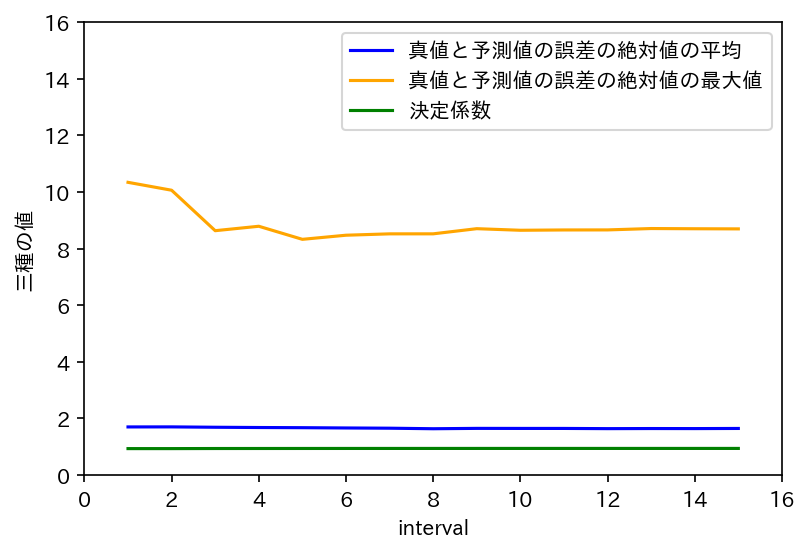

In [12]:
interval=range(1,16)
fig, ax = plt.subplots(dpi=150)
ax.plot(interval,av,color='blue',label='真値と予測値の誤差の絶対値の平均')
ax.plot(interval,mx,color='orange',label='真値と予測値の誤差の絶対値の最大値')
ax.plot(interval,dter,color='green',label='決定係数')
ax.set(xlabel='interval',ylabel='三種の値',xlim=(0,16),ylim=(0,16))
ax.legend();